
# Análise dos Resultados da Clusterização com a Grande Base 4

**Objetivo**: Encontrar resultados relevantes a partir da análise da grande base 4. 

---

## Imports + Loading Dataframe
------

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [134]:
#df= pd.read_csv('Grande Base 4.csv' , encoding='latin1')
df= pd.read_csv('https://github.com/ieee-uerj/capes-data-analysis/raw/main/data/Grande_Base_4.csv' , encoding='latin1')
df1 = df.copy() #Criando uma copia do df 

## Tratando os Dados antes de Clusterizar 
---

In [135]:
df1.loc[df['CS_STATUS_JURIDICO'] == 'FEDERAL', 'CS_STATUS_JURIDICO'] = 1
df1.loc[df['CS_STATUS_JURIDICO'] == 'PARTICULAR', 'CS_STATUS_JURIDICO'] = 2
df1.loc[df['CS_STATUS_JURIDICO'] == 'ESTADUAL', 'CS_STATUS_JURIDICO'] = 3
df1.loc[df['CS_STATUS_JURIDICO'] == 'MUNICIPAL', 'CS_STATUS_JURIDICO'] = 0

In [136]:
df1['CS_STATUS_JURIDICO'].unique()     # verificando se os dados foram alterados. 

array([1, 2, 3, 0], dtype=object)

In [137]:
df1.loc[df['NM_REGIAO'] == 'SUDESTE', 'NM_REGIAO'] = 1
df1.loc[df['NM_REGIAO'] == 'CENTRO-OESTE', 'NM_REGIAO'] = 2
df1.loc[df['NM_REGIAO'] == 'NORTE', 'NM_REGIAO'] = 3
df1.loc[df['NM_REGIAO'] == 'SUL', 'NM_REGIAO'] = 4
df1.loc[df['NM_REGIAO'] == 'NORDESTE', 'NM_REGIAO'] = 0

In [138]:
df1['NM_REGIAO'].unique()

array([3, 0, 1, 4, 2], dtype=object)

In [139]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [140]:
df1['NM_SUBTIPO_PRODUCAO'].unique()

array(['TESE', 'DISSERTAÇÃO',
       'PROJETO DE APLICAÇÃO OU ADEQUAÇÃO TECNOLÓGICA',
       'PROPOSTA DE INTERVENÇÃO EM PROCEDIMENTOS CLÍNICOS OU DE SERVIÇO PERTINENTE',
       'ARTIGO', 'MATERIAL DIDÁTICO E INSTRUCIONAL',
       'RELATÓRIO FINAL DE PESQUISA', 'PROJETO TÉCNICO',
       'PROPOSTA PEDAGÓGICA', 'PRODUTO, PROCESSO OU TÉCNICA',
       'PROJETO DE INOVAÇÃO TECNOLÓGICA', 'PATENTE',
       'PROCESSO DE CRIAÇÃO', 'OUTROS', 'SOFTWARE',
       'REGISTRO DE PROPRIEDADE INTELECTUAL', 'ESTUDO DE CASO',
       'REVISÃO SISTEMÁTICA E APROFUNDADA DA LITERATURA',
       'PROTOCOLO EXPERIMENTAL OU DE APLICAÇÃO EM SERVIÇOS',
       'MANUAL DE OPERAÇÃO TÉCNICA',
       'RELATÓRIO TÉCNICO COM REGRAS DE SIGILO', 'EDITORIA',
       'PUBLICAÇÃO TECNOLÓGICA', 'PRODUÇÃO ARTÍSTICA',
       'PROTÓTIPO PARA DESENVOLVIMENTO OU PRODUÇÃO DE INSTRUMENTOS',
       'PRODUÇÃO DE PROGRAMAS DE MÍDIA'], dtype=object)

In [141]:
df.head(20)

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,NM_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,AN_NASCIMENTO_DOCENTE,SG_ENTIDADE_ENSINO,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,CS_STATUS_JURIDICO,AN_NASCIMENTO_DISCENTE,NM_REGIAO,SG_UF_PROGRAMA,CD_CONCEITO_PROGRAMA,UF_NM_MODALIDADE_PROGRAMA,UF_Qtd_Proj,UF_Outros projetos,UF_Qtd_Financiamentos,UF_BOLSA,UF_OUTRO AUXILIO FINANCEIRO,SEM AUXILIO,UF_DS_DEPENDENCIA_ADMINISTRATIVA,UF_QTD_FINANCIADORES
0,10001018002P1,2013,9,25,10,15,25,0,16,9,0,25,0,23,2,12,8,2,3,0,2,3.0,2.0,TESE,0.0,NaN,0,21,1967.560000,UNIR,29,48,77,0,13.440000,3.080000,77,0.376623,1.889019,40.761905,NaN,FEDERAL,1981.000000,NORTE,RO,3,1,19,2.0,16,1.0,15.0,0.0,1,3
1,10001018002P1,2014,9,22,8,14,22,0,16,6,0,22,0,20,2,12,7,0,3,0,2,3.0,2.0,TESE,1.0,80.000000,0,13,1966.954545,UNIR,26,43,68,1,16.320817,3.136364,69,0.376812,2.193154,31.461538,3.636364,FEDERAL,1983.275362,NORTE,RO,3,1,26,3.0,20,1.0,19.0,0.0,1,3
2,10001018002P1,2015,9,22,8,14,22,0,15,5,2,22,0,20,2,12,9,0,1,0,2,3.0,2.0,TESE,0.0,NaN,0,20,1971.136364,UNIR,33,57,88,2,13.174747,4.090909,90,0.366667,3.082192,29.200000,NaN,FEDERAL,1984.311111,NORTE,RO,3,1,26,3.0,19,1.0,18.0,0.0,1,3
3,10001018002P1,2016,9,20,7,13,20,0,14,4,2,20,0,18,2,11,8,0,1,0,2,3.0,2.0,TESE,0.0,NaN,0,18,1972.200000,UNIR,28,53,80,1,14.293827,4.050000,81,0.345679,2.685083,30.166667,NaN,FEDERAL,1986.493827,NORTE,RO,3,1,40,5.0,32,2.0,30.0,0.0,1,4
4,10001018002P1,2017,9,22,8,14,22,0,16,4,2,22,0,20,2,12,9,0,1,0,2,4.0,2.0,TESE,1.0,NaN,0,21,1973.727273,UNIR,43,64,106,1,13.852167,4.863636,107,0.401869,3.763819,28.428571,NaN,FEDERAL,1987.579439,NORTE,RO,4,1,68,7.0,58,6.0,52.0,0.0,1,4
5,10001018002P1,2018,9,18,6,12,18,0,14,3,1,18,0,16,2,11,7,0,0,0,2,4.0,2.0,TESE,1.0,NaN,0,15,1975.388889,UNIR,37,54,89,2,13.138584,5.055556,91,0.406593,2.411661,37.733333,NaN,FEDERAL,1988.527473,NORTE,RO,4,1,62,7.0,53,6.0,47.0,0.0,1,3
6,10001018004P4,2013,45,38,11,27,38,0,3,32,3,38,0,35,3,1,26,10,1,0,2,4.0,2.0,DISSERTAÇÃO,1.0,87.600000,0,15,1963.684211,UNIR,24,48,72,0,17.815789,1.894737,72,0.333333,2.416107,29.800000,2.305263,FEDERAL,1981.500000,NORTE,RO,4,1,47,2.0,28,0.0,28.0,0.0,1,4
7,10001018004P4,2014,45,37,10,27,37,0,2,32,3,37,0,34,3,1,25,10,1,0,2,4.0,2.0,DISSERTAÇÃO,1.0,87.000000,0,10,1963.729730,UNIR,20,42,62,0,17.318657,1.675676,62,0.322581,2.254545,27.500000,2.351351,FEDERAL,1981.048387,NORTE,RO,4,1,44,1.0,26,0.0,26.0,0.0,1,4
8,10001018004P4,2015,45,30,8,22,30,0,3,24,3,30,0,30,0,3,19,8,0,0,2,4.0,2.0,DISSERTAÇÃO,1.0,87.555556,0,18,1967.733333,UNIR,24,48,72,0,13.850000,2.400000,72,0.333333,2.854626,25.222222,2.918519,FEDERAL,1981.583333,NORTE,RO,4,1,41,1.0,21,0.0,21.0,0.0,1,4
9,10001018004P4,2016,45,29,8,21,29,0,3,23,3,29,0,29,0,3,18,8,0,0,2,4.0,2.0,TESE,1.0,81.230769,0,13,1968.103448,UNIR,27,40,66,1,13.299537,2.310345,67,0.402985,2.399449,27.923077,2.801061,FEDERAL,1981.402985,NORTE,RO,4,1,37,1.0,19,0.0,19.0,0.0,1,3


In [142]:
def Muda_valor (col):
  data = col[0]
  if data == 'DISSERTAÇÃO':
    return 1
  elif data == 'TESE':
    return 2
  else:
    return 0
df1['NM_SUBTIPO_PRODUCAO'] = df1[['NM_SUBTIPO_PRODUCAO']].apply(Muda_valor, axis =1)

In [143]:
df1['NM_SUBTIPO_PRODUCAO'].unique()

array([2, 1, 0], dtype=int64)

In [144]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20141 entries, 0 to 20140
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CD_PROGRAMA_IES                   20141 non-null  object 
 1   AN_BASE                           20141 non-null  int64  
 2   CD_AREA_AVALIACAO                 20141 non-null  int64  
 3   IB_Total_docentes                 20141 non-null  int64  
 4   IB_Mulheres                       20141 non-null  int64  
 5   IB_Homens                         20141 non-null  int64  
 6   IB_Brasileiros                    20141 non-null  int64  
 7   IB_Estrangeiros                   20141 non-null  int64  
 8   IB_QTDE_Regime_Parcial            20141 non-null  int64  
 9   IB_QTDE_Regime_Integral           20141 non-null  int64  
 10  IB_QTDE_Regime_Exclusivo          20141 non-null  int64  
 11  IB_QTDE_Prof_Doutor               20141 non-null  int64  
 12  IB_Q

In [145]:
df1.drop('SG_ENTIDADE_ENSINO', 1,inplace=True)
df1.drop('SG_UF_PROGRAMA', 1,inplace=True) 
df1.drop('GUS_pag_por_aluno', 1,inplace=True)
df1.drop('CD_PROGRAMA_IES', 1,inplace=True)  
df1.drop('NM_REGIAO', 1,inplace=True)
df1.drop('NR_PAGINAS', 1,inplace=True)
df1.drop('MEDIA_CONCEITO_CURSO', 1,inplace=True)

c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except 

In [147]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20141 entries, 0 to 20140
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   AN_BASE                           20141 non-null  int64  
 1   CD_AREA_AVALIACAO                 20141 non-null  int64  
 2   IB_Total_docentes                 20141 non-null  int64  
 3   IB_Mulheres                       20141 non-null  int64  
 4   IB_Homens                         20141 non-null  int64  
 5   IB_Brasileiros                    20141 non-null  int64  
 6   IB_Estrangeiros                   20141 non-null  int64  
 7   IB_QTDE_Regime_Parcial            20141 non-null  int64  
 8   IB_QTDE_Regime_Integral           20141 non-null  int64  
 9   IB_QTDE_Regime_Exclusivo          20141 non-null  int64  
 10  IB_QTDE_Prof_Doutor               20141 non-null  int64  
 11  IB_QTDE_Prof_NaoDoutor            20141 non-null  int64  
 12  IB_Q

In [148]:
#verificando se há linhas nulas

for i in df1.columns:
    if df1[i].isnull().sum() > 0:
        print(i)
print('fim')

GUS_Dis_Aluno_Tempo
QT_MES_TITULACAO
fim


In [159]:
df1['QT_MES_TITULACAO'].isnull().sum()   #verificando a quantidade de valores nulo na coluna

1

In [162]:
df1['GUS_Dis_Aluno_Tempo'].isnull().sum()   #verificando a quantidade de valores nulo na coluna

1

In [161]:
df1.loc[df1['QT_MES_TITULACAO'].isnull() == True] #identificando a linha que está o valor nulo.

#O Valor nulo de ambas as colunas está nessa linha 17317.

,AN_BASE,CD_AREA_AVALIACAO,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,ID_SUBTIPO_PRODUCAO,NM_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,CS_STATUS_JURIDICO,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,UF_NM_MODALIDADE_PROGRAMA,UF_Qtd_Proj,UF_Outros projetos,UF_Qtd_Financiamentos,UF_BOLSA,UF_OUTRO AUXILIO FINANCEIRO,SEM AUXILIO,UF_DS_DEPENDENCIA_ADMINISTRATIVA,UF_QTD_FINANCIADORES
17317,2018,5,18,5,13,18,0,2,14,2,17,1,15,3,2,14,1,0,1,1,2.0,1,0.0,0,3,1972.333333,11,7,18,0,19.333333,1.0,18,0.611111,NaN,NaN,1,1991.666667,3,1,24,4.0,8,6.0,2.0,0.0,1,3


In [168]:
df1['QT_MES_TITULACAO'][17317] = df1['QT_MES_TITULACAO'].mean()

c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [169]:
df1['QT_MES_TITULACAO'][17317]

30.76382547993783

In [170]:
df1['GUS_Dis_Aluno_Tempo'][17317] = df1['GUS_Dis_Aluno_Tempo'].mean()

c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [171]:
#verificando se ainda há linhas nulas

for i in df1.columns:
    if df1[i].isnull().sum() > 0:
        print(i)
print('fim')

fim


## Clusterização - Kmeans
---

### Escalonamento

In [173]:
f_escalonamento= StandardScaler()
D_escalonados= f_escalonamento.fit_transform(df1)

In [174]:
f_PCA= PCA( n_components=2 )
d_PCA= f_PCA.fit_transform(df1)

In [175]:
d_PCA[0:5]

array([[-31.5444801 , -29.50537702],
       [-43.41772395, -18.18313116],
       [-12.96997487, -29.35060504],
       [-19.82234293,  -5.59142606],
       [ 32.62857071,  19.7029811 ]])

### Cotovelo 

###### Esse método serve para verificar a quantidade ideal de clusteres. 

In [176]:
distancia = []
repeticoes = range(1,20)
for x in repeticoes:
  modelo = KMeans(n_clusters=x)
  modelo.fit(D_escalonados)
  distancia.append(modelo.inertia_)

In [177]:
print(distancia)

[966768.0000000003, 813741.3222074246, 746541.7268874602, 706348.325868897, 678422.2755363177, 657469.9512970024, 643431.2418980438, 627828.6349621466, 612921.2596982594, 600694.4217910885, 591596.4146063786, 577587.4673375573, 572918.3238541571, 560155.2359744566, 552392.8995614543, 541332.2619024897, 533325.1163185256, 529424.9075767884, 518057.90085520095]


Text(0, 0.5, 'distancia do cluster')

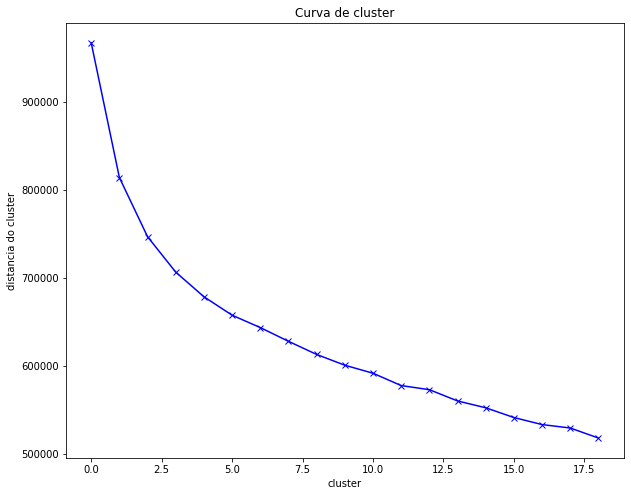

In [178]:
plt.figure(figsize=(10,8))
plt.title('Curva de cluster')
plt.plot(distancia, 'bx-')
plt.xlabel('cluster')
plt.ylabel('distancia do cluster')

In [179]:
import math
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [180]:
optimal_number_of_clusters(distancia)

6

### Clustering K means 

##### Agora de fato será implementado a clusterização. 

In [182]:
modelo=KMeans(n_clusters=6)
modelo.fit(D_escalonados)
centroides= modelo.cluster_centers_

In [183]:
rotulos = modelo

In [184]:
rotulos

KMeans(n_clusters=6)

In [185]:
B_PCA=pd.DataFrame(data = d_PCA, columns=['Eixo_1', 'Eixo_2'])

In [186]:
B_PCA.head()

,Eixo_1,Eixo_2
0,-31.544480,-29.505377
1,-43.417724,-18.183131
2,-12.969975,-29.350605
3,-19.822343,-5.591426
4,32.628571,19.702981


<AxesSubplot:title={'center':'grafico'}, xlabel='Eixo_1', ylabel='Eixo_2'>

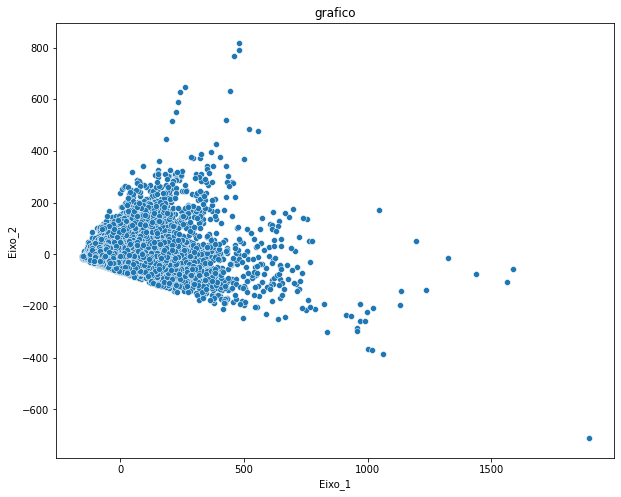

In [187]:
plt.figure(figsize=(10,8))
plt.title('grafico')
sns.scatterplot(x='Eixo_1', y = 'Eixo_2', data = B_PCA)

In [188]:
#erro ainda não identificado 
A = pd.concat([B_PCA, pd.DataFrame({'Cluster': rotulos})])
A.head()

ValueError: If using all scalar values, you must pass an index

In [190]:
"""
paletas_cores =['red', 'green', 'blue', 'yellow', 'pink', 'gray','purple']
plt.figure(figsize=(10,8))
plt.title('DADOS')
sns.scatterplot(x='Eixo_1', y ='Eixo_2', hue='Cluster', data = A, palette=paletas_cores[0:6] )
"""

"\npaletas_cores =['red', 'green', 'blue', 'yellow', 'pink', 'gray','purple']\nplt.figure(figsize=(10,8))\nplt.title('DADOS')\nsns.scatterplot(x='Eixo_1', y ='Eixo_2', hue='Cluster', data = A, palette=paletas_cores[0:6] )\n"